<a href="https://colab.research.google.com/github/elli1zabeth/wyklad/blob/main/Las_losowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
data = datasets.load_iris()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

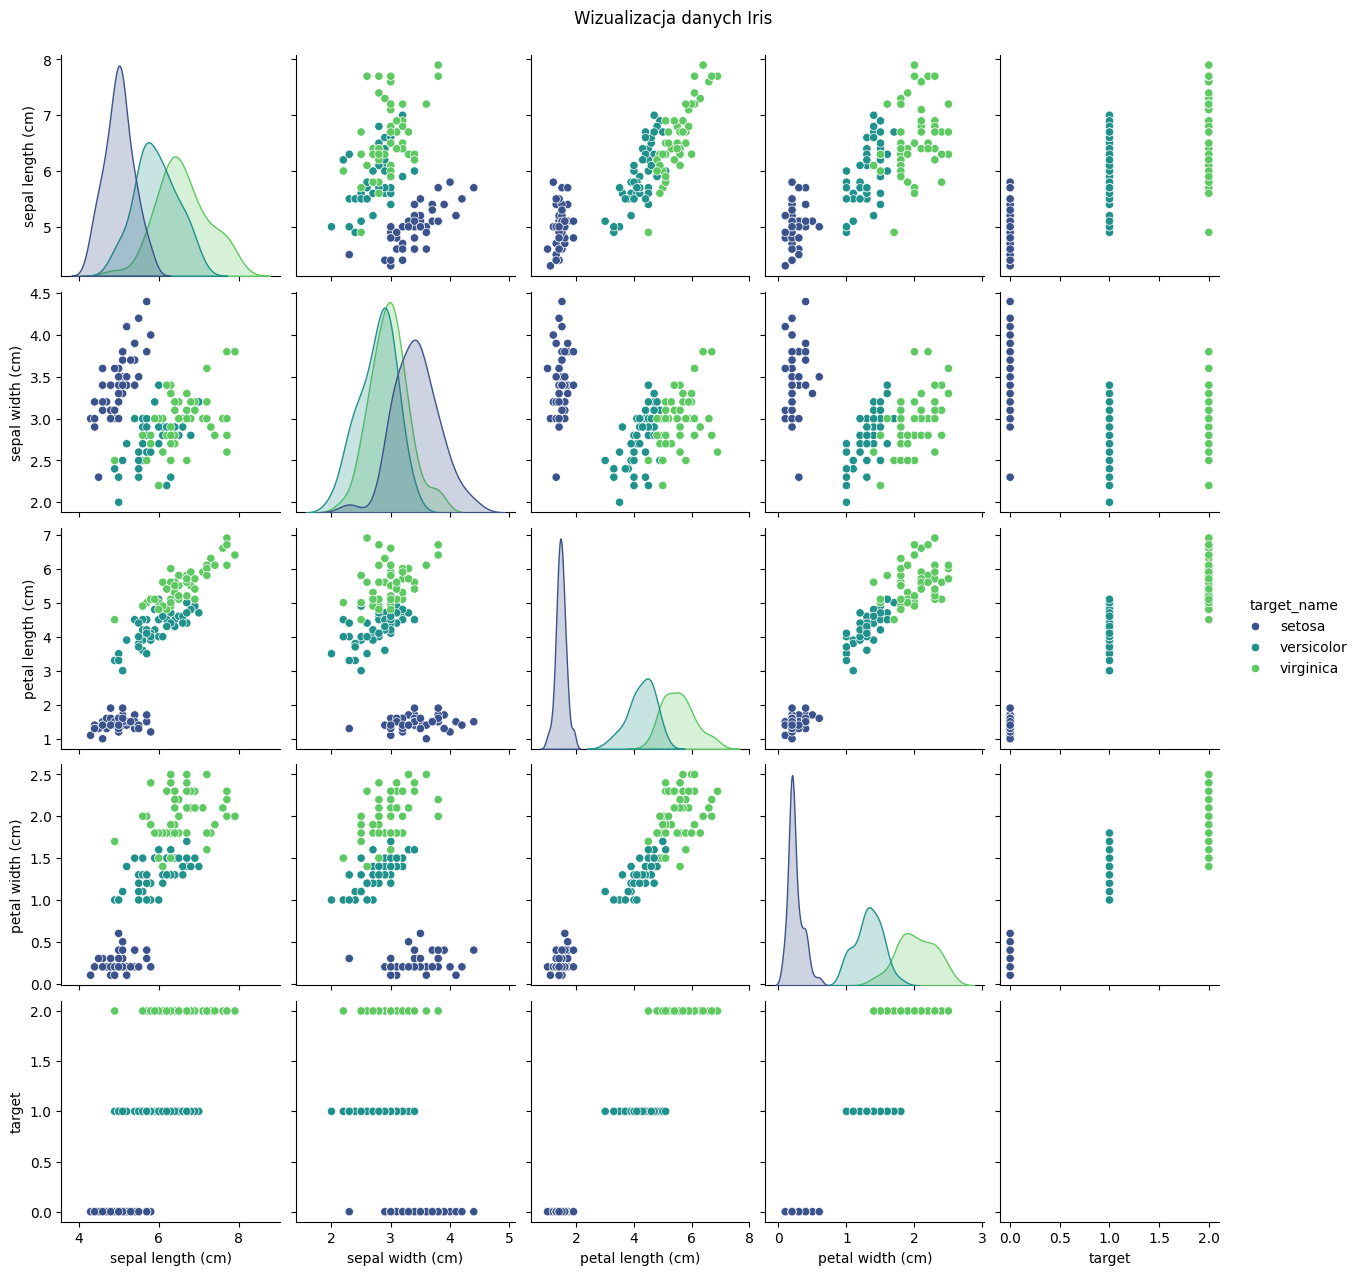

In [ ]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['target_name'] = df['target'].map({i: name for i, name in enumerate(data.target_names)})

#1. Wizualizacja
sns.pairplot(df, hue='target_name', palette='viridis')
plt.suptitle('Wizualizacja danych Iris', y=1.02)
plt.show()

In [ ]:
import numpy as np
from collections import Counter

#2. Który z podziałów jest lepszy
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [ ]:
def information_gain(X, y, split_value):
    parent_entropy = entropy(y)

    left_idx = X <= split_value
    right_idx = X > split_value

    n = len(y)
    n_left, n_right = sum(left_idx), sum(right_idx)

    if n_left == 0 or n_right == 0:
        return 0

    e_left = entropy(y[left_idx])
    e_right = entropy(y[right_idx])
    child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

    return parent_entropy - child_entropy

In [ ]:
X_petal_width = df['petal width (cm)'].values
y = df['target'].values

# Obliczenie zysku informacyjnego
ig_15 = information_gain(X_petal_width, y, 1.5)
ig_038 = information_gain(X_petal_width, y, 0.38)

print(f"Zysk informacyjny dla podziału na poziomie 1.5: {ig_15:.4f}")
print(f"Zysk informacyjny dla podziału na poziomie 0.38: {ig_038:.4f}")

if ig_15 > ig_038:
    print("Lepszy jest podział na poziomie 1.5")
else:
    print("Lepszy jest podział na poziomie 0.38")

Zysk informacyjny dla podziału na poziomie 1.5: 0.6656
Zysk informacyjny dla podziału na poziomie 0.38: 0.6195
Lepszy jest podział na poziomie 1.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#3. Drzewo decyzyjne i las losowy; 30% zbiór testowy
X = df[data.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Drzewo decyzyjne
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDrzewo decyzyjne:")
print(classification_report(y_test, y_pred_dt, target_names=data.target_names))
print(f"Dokładność: {accuracy_score(y_test, y_pred_dt):.4f}")


Drzewo decyzyjne:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Dokładność: 0.9778


In [ ]:
# Las losowy
rf = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Las losowy (15 drzew):")
print(classification_report(y_test, y_pred_rf, target_names=data.target_names))
print(f"Dokładność: {accuracy_score(y_test, y_pred_rf):.4f}")

Las losowy (15 drzew):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Dokładność: 1.0000


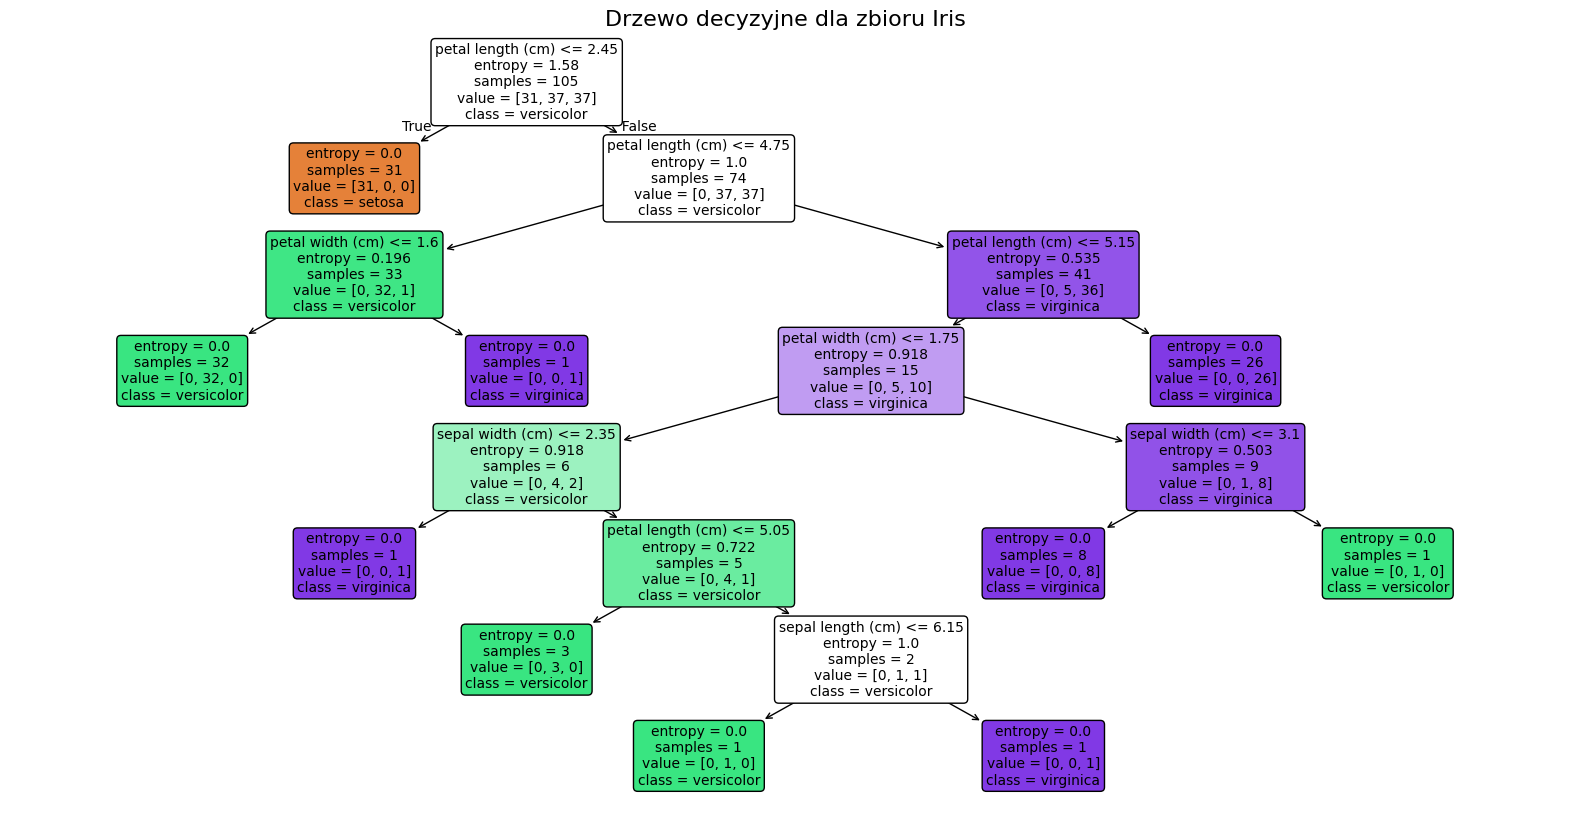

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=data.feature_names,
          class_names=data.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Drzewo decyzyjne dla zbioru Iris", fontsize=16)
plt.show()

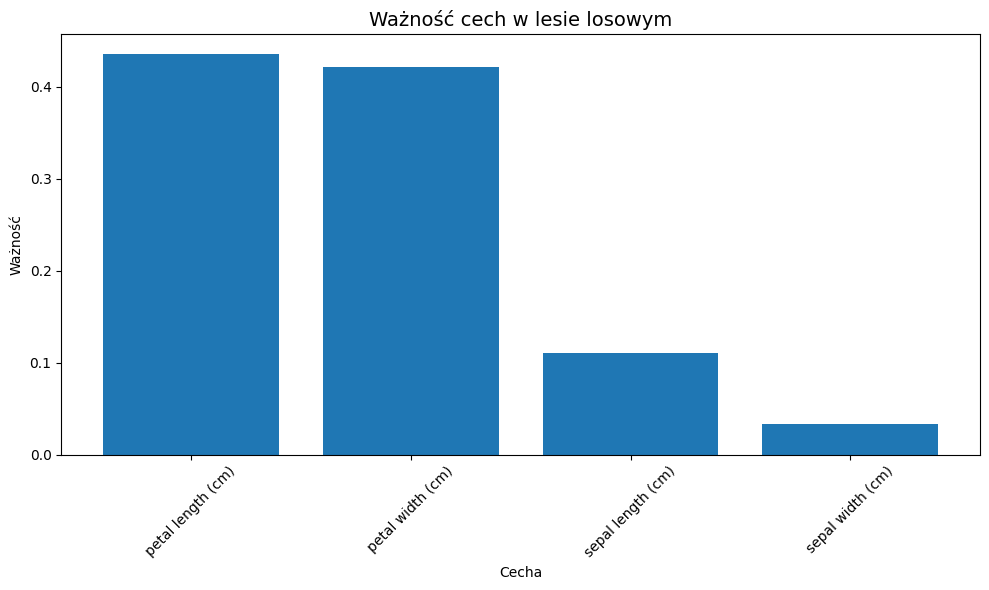

In [ ]:
plt.figure(figsize=(10, 6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.title('Ważność cech w lesie losowym', fontsize=14)
plt.xlabel('Cecha')
plt.ylabel('Ważność')
plt.tight_layout()
plt.show()